In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 666)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 888)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [11]:
# 使用超参数搜索，得到最佳的模型

# 指定可选的学习率
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]

# 创建histories列表用于保存所有训练过程
histories = []

# 使用不同学习率进行模型简单训练，得到参数的预估
for lr in learning_rates:
    # 初始化模型，指定损失函数、优化器
    # 隐藏层设置1层
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                          input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    
    # 指定优化器
    optimizer = keras.optimizers.SGD(lr)
    
    # 编译模型
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    # 指定回调函数
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    
    # 训练模型
    history = model.fit(x_train_scaled, y_train,
                        validation_data=(x_valid_scaled, y_valid),
                        callbacks=callbacks, epochs=100)
    # 保存训练过程
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 5.7939 - val_loss: 4.6536
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 4.0971 - val_loss: 3.4275
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 3.1225 - val_loss: 2.6800
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 2.5065 - val_loss: 2.1892
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 2.0884 - val_loss: 1.8490
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 1.7888 - val_loss: 1.6026
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 1.5643 - val_loss: 1.4174
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3916 - val_loss: 1.2744
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 1.2563 - val_loss: 1.1630
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1503 - val_lo

363/363 [==============================] - 1s 1ms/step - loss: 0.6920 - val_loss: 0.6699
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6772 - val_loss: 0.6565
Epoch 11/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6642 - val_loss: 0.6445
Epoch 12/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6524 - val_loss: 0.6336
Epoch 13/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6417 - val_loss: 0.6234
Epoch 14/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6318 - val_loss: 0.6141
Epoch 15/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6228 - val_loss: 0.6055
Epoch 16/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6145 - val_loss: 0.5977
Epoch 17/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6068 - val_loss: 0.5904
Epoch 18/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5997 - val_loss: 

363/363 [==============================] - 1s 1ms/step - loss: 0.4466 - val_loss: 0.4285
Epoch 18/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4441 - val_loss: 0.4262
Epoch 19/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4416 - val_loss: 0.4250
Epoch 20/100
  1/363 [..............................] - ETA: 0s - loss: 0.5156

KeyboardInterrupt: 

Learning rate:  0.0001


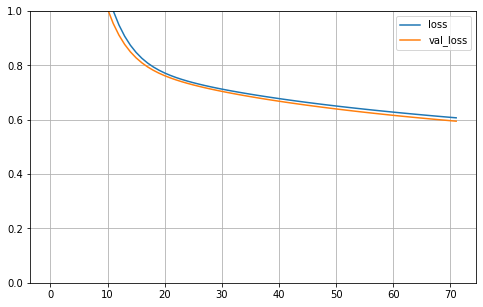

Learning rate:  0.0003


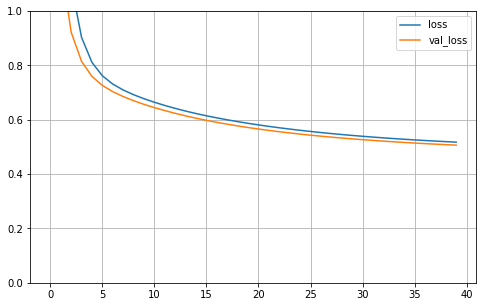

Learning rate:  0.001


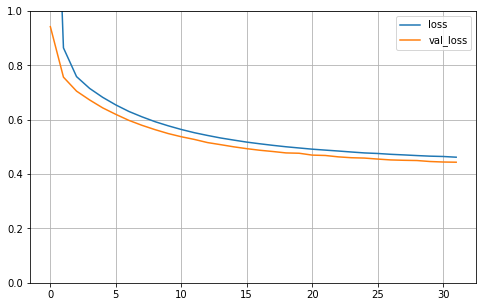

In [12]:
# 通过绘制不同参数下模型的loss图，推断最佳参数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    plot_learning_curves(history)